# Dynamika Punktu Materialnego 1D

## Zad1

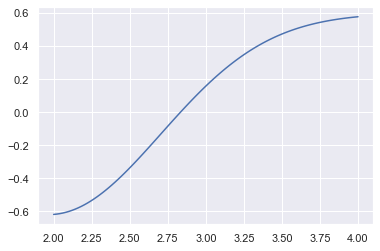

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
sns.set()

m=1 #[kg]
v=0
E=-0.6 #[J]
eps=1e-5 #prezycja wyznaczania zera

def fun_potential(x):
    return -np.exp(-x**2)-1.2*np.exp(-(x-2)**2) #[J]

def fun(x):
    return fun_potential(x)-E 

x=np.linspace(2,4,100)
f=fun(x)
plt.plot(x,f)

### Zad 1a

Miejsce zerowe funkcji to: 2.83288


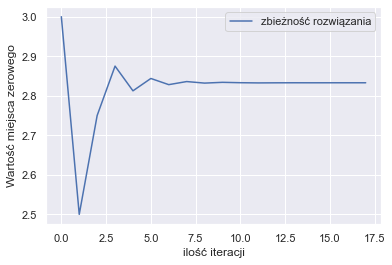

In [2]:
def fun_bisek(f,a,b):
    assert (f(a)>0 and f(b)<0) or (f(a)<0 and f(b)>0), "Złe punkty graniczne"
    m_tab=[]
    mi=(a+b)/2
    while abs(a-b)>eps:
        m_tab.append(mi)
        if f(a)*f(mi)<0: b=mi
        elif f(b)*f(mi)<0: a=mi
        mi=(a+b)/2
    
    print("Miejsce zerowe funkcji to: {:.5f}".format(mi))
    plt.plot(m_tab,label="zbieżność rozwiązania")
    plt.xlabel("ilość iteracji")
    plt.ylabel("Wartość miejsca zerowego")
    plt.legend()
    plt.grid(True)
    plt.show()

fun_bisek(fun,2,4)

### Zad 1b

Miejsce zerowe funkcji to: 2.83288


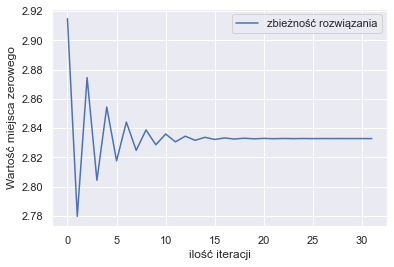

In [3]:
def diff(f,x,dx):
    return (f(x+dx)-f(x-dx))/(2*dx)

def fun_newton_raphson(f,a,dx):
    tab_xn=[]
    x_n=a
    x_n1=x_n-f(x_n)/diff(f,x_n,dx)
    while abs(x_n - x_n1) > eps :
        x_n=x_n1
        x_n1=x_n-f(x_n)/diff(f,x_n,dx)
        tab_xn.append(x_n1)
    
    #print(tab_xn)
    print("Miejsce zerowe funkcji to: {:.5f}".format(x_n1))
    plt.plot(tab_xn,label="zbieżność rozwiązania")
    plt.xlabel("ilość iteracji")
    plt.ylabel("Wartość miejsca zerowego")
    plt.legend()
    plt.grid(True)
    plt.show()

fun_newton_raphson(fun,3,1)


## Zad2

In [4]:
def fun_diff(x):
    return 2*x*np.exp(-x**2)-1.2*(-2*x+4)*np.exp(-(x-2)**2)

def x_t(x,v0,dt):
    return x+v0*dt

def v_t(x,v0,dt):
    return v0-(1/m)*fun_diff(x)*dt

def fun_Ek(v):
    return m*v**2/2

def fun_euler(x0,v0,dt,t):
    x_tab=[]
    v_tab=[]
    Ek_tab=[]
    V_tab=[]
    E_tab=[]

    for i in t:
        temp=x0
        x0=x_t(x0,v0,dt)
        v0=v_t(temp,v0,dt)
        ek=fun_Ek(v0)
        v=fun_potential(x0)
        ene=ek+v

        x_tab.append(x0)
        v_tab.append(v0)
        Ek_tab.append(ek)
        V_tab.append(v)
        E_tab.append(ene)
    
    return (x_tab,v_tab,Ek_tab,V_tab,E_tab)

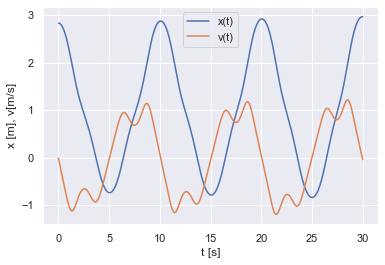

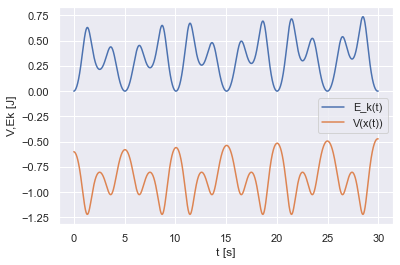

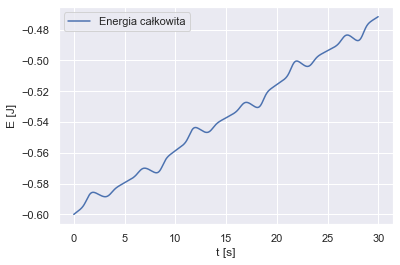

In [5]:
dt=0.01
t=np.arange(0,30,dt) #przedział t [s]
v0=0
x0=2.83288

x_tab,v_tab,Ek_tab,V_tab,E_tab=fun_euler(x0,v0,dt,t)

plt.plot(t,x_tab,label="x(t)")
plt.plot(t,v_tab,label="v(t)")
plt.xlabel("t [s]")
plt.ylabel("x [m], v[m/s]")
plt.legend()
plt.show()

plt.plot(t,Ek_tab,label="E_k(t)")
plt.plot(t,V_tab,label="V(x(t))")
plt.xlabel("t [s]")
plt.ylabel("V,Ek [J]")
plt.legend()
plt.show()

plt.plot(t,E_tab,label="Energia całkowita")
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("E [J]")
plt.show()

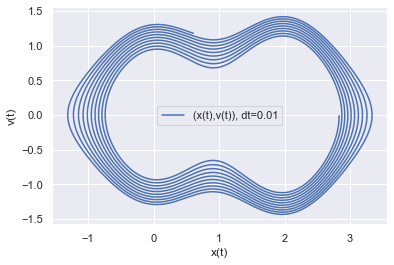

In [6]:
dt_tab=[0.01,0.001]
t1=np.arange(0,100,dt_tab[0])
t2=np.arange(0,100,dt_tab[1])


x_tab1=fun_euler(x0,v0,dt_tab[0],t1)[0]
v_tab1=fun_euler(x0,v0,dt_tab[0],t1)[1]

x_tab2=fun_euler(x0,v0,dt_tab[1],t2)[0]
v_tab2=fun_euler(x0,v0,dt_tab[1],t2)[1]

plt.plot(x_tab1,v_tab1,label="(x(t),v(t)), dt=0.01")
plt.legend()
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.show()


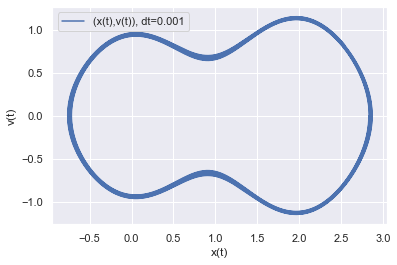

In [7]:
plt.plot(x_tab2,v_tab2,label="(x(t),v(t)), dt=0.001")
plt.legend()
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.show()

## Zad3

In [8]:
def v_t_damp(x,v0,dt,a):
    return v0-(1/m)*fun_diff(x)*dt-a*v0*dt

def fun_euler_damp(x0,v0,dt,t,a):
    x_tab=[]
    v_tab=[]
    Ek_tab=[]
    V_tab=[]
    E_tab=[]

    for i in t:
        temp=x0
        x0=x_t(x0,v0,dt)
        v0=v_t_damp(temp,v0,dt,a)
        ek=fun_Ek(v0)
        v=fun_potential(x0)
        ene=ek+v

        x_tab.append(x0)
        v_tab.append(v0)
        Ek_tab.append(ek)
        V_tab.append(v)
        E_tab.append(ene)
    
    return (x_tab,v_tab,Ek_tab,V_tab,E_tab)

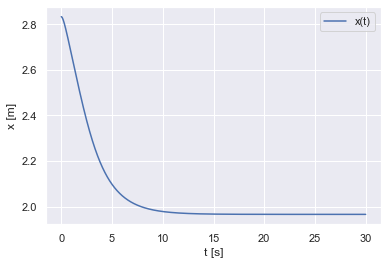

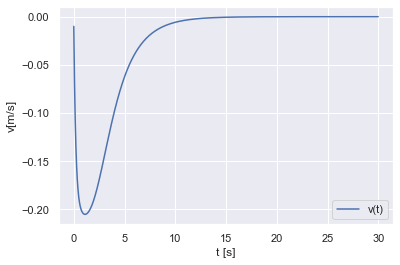

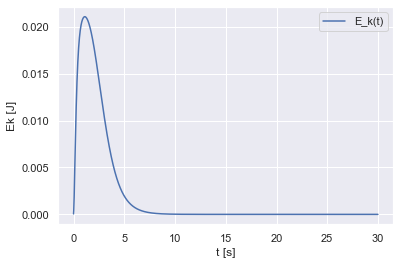

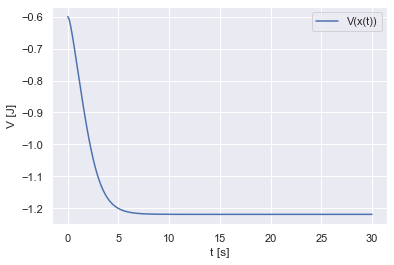

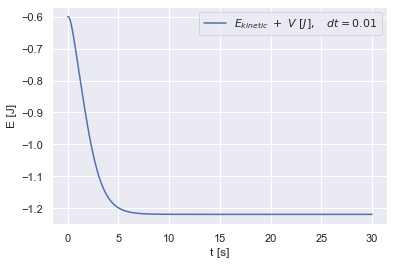

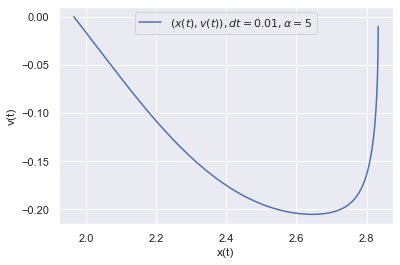

In [9]:
dt=0.01
t=np.arange(0,30,dt) #przedział t [s]
v0=0
x0=2.83288
a=5

x_tab,v_tab,Ek_tab,V_tab,E_tab=fun_euler_damp(x0,v0,dt,t,a)

plt.plot(t,x_tab,label="x(t)")
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.legend()
plt.show()

plt.plot(t,v_tab,label="v(t)")
plt.xlabel("t [s]")
plt.ylabel("v[m/s]")
plt.legend()
plt.show()

plt.plot(t,Ek_tab,label="E_k(t)")
plt.xlabel("t [s]")
plt.ylabel("Ek [J]")
plt.legend()
plt.show()


plt.plot(t,V_tab,label="V(x(t))")
plt.xlabel("t [s]")
plt.ylabel("V [J]")
plt.legend()
plt.show()

plt.plot(t,E_tab,label=r"$E_{kinetic}\ +\ V\ [J],\ \ \ dt=0.01$")
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("E [J]")
plt.show()

t=np.arange(0,100,dt)

plt.plot(x_tab,v_tab,label=r"$(x(t),v(t)), dt=0.01,\alpha=5$")
plt.legend()
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.show()

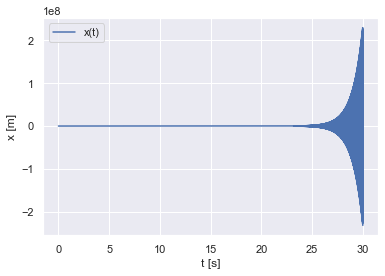

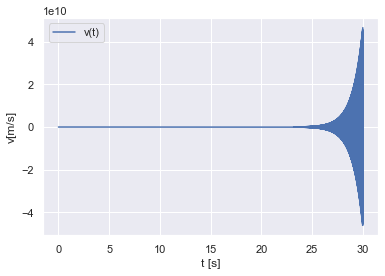

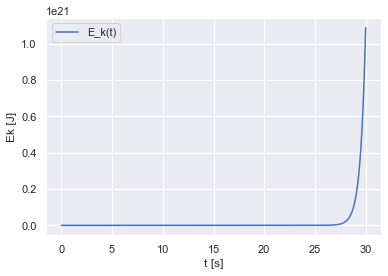

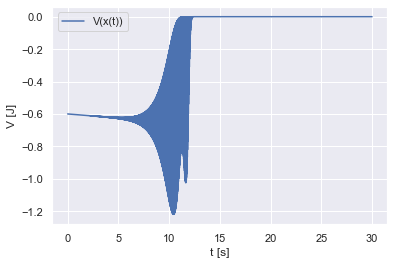

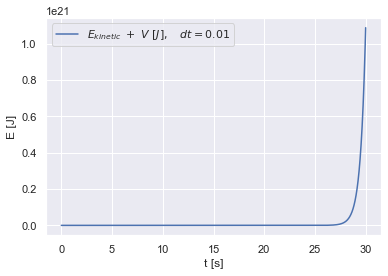

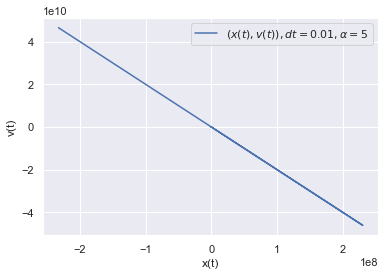

In [10]:
dt=0.01
t=np.arange(0,30,dt) #przedział t [s]
v0=0
x0=2.83288
a=201

x_tab,v_tab,Ek_tab,V_tab,E_tab=fun_euler_damp(x0,v0,dt,t,a)

plt.plot(t,x_tab,label="x(t)")
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.legend()
plt.show()

plt.plot(t,v_tab,label="v(t)")
plt.xlabel("t [s]")
plt.ylabel("v[m/s]")
plt.legend()
plt.show()

plt.plot(t,Ek_tab,label="E_k(t)")
plt.xlabel("t [s]")
plt.ylabel("Ek [J]")
plt.legend()
plt.show()


plt.plot(t,V_tab,label="V(x(t))")
plt.xlabel("t [s]")
plt.ylabel("V [J]")
plt.legend()
plt.show()

plt.plot(t,E_tab,label=r"$E_{kinetic}\ +\ V\ [J],\ \ \ dt=0.01$")
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("E [J]")
plt.show()

t=np.arange(0,100,dt)
plt.plot(x_tab,v_tab,label=r"$(x(t),v(t)), dt=0.01,\alpha=5$")
plt.legend()
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.show()

## Zad4

In [11]:
m=1
#def xn_1(x0,v0,dt):
    #return x0+dt*(v_t(x0,v0,dt)+v0)/2

#def vn_1(x0,v0,x,v,a,dt):
    #return v0+dt*(-(1/m)*fun_diff(x_t(x0,v0,dt))-a*v_t(x0,v0,dt)-(1/m)*fun_diff(x0)-a*v0)/2

def f1(x0,v0,x,v,a,dt):
    return x-x0-dt*v/2-dt*v0/2

def f2(x0,v0,x,v,a,dt):
    V1=diff(fun,x,1e-5)
    V0=diff(fun,x0,1e-5)
    
    return v-v0-(dt/2)*(-V1/m-a*v)-(dt/2)*(-V0/m-a*v0)


def fun_diff2(f,x,dx=1e-5):
    return (f(x+dx)-2*f(x)+f(x-dx))/(dx**2)

v0=0
x0=2.83288
a=0
dt=0.01 
m=1

x=x0
v=v0
    
for i in range(5):

    A=np.array([[ 1 , -dt/2 ],[ dt*fun_diff2(fun,x)/(2*m) , 1+dt*a/2 ]])
    B=-np.array([f1(x0,v0,x,v,a,dt),f2(x0,v0,x,v,a,dt)])
    C=np.linalg.solve(A,B)
    x=x+C[0]
    v=v+C[1]

    print("i={}:  x={}    v={}    ".format(i,x,v))

i=0:  x=2.8328299610132976    v=-0.010007797340398762    
i=1:  x=2.832829961013397    v=-0.010007797320576758    
i=2:  x=2.832829961013397    v=-0.010007797320576994    
i=3:  x=2.832829961013397    v=-0.010007797320576994    
i=4:  x=2.832829961013397    v=-0.010007797320576994    


## Zad5

In [ ]:
def trapezy(x0,v0,dt,a,t):
    x_tab=[]
    v_tab=[]
    E_tab=[]

    x=x0
    v=v0
    
    for i in t:
        for i in range(5):

            A=np.array([[ 1 , -dt/2 ],[ dt/(2*m)*fun_diff2(fun,x_t(x,v,dt)) , 1+dt*a/2 ]])
            B=-np.array([f1(x0,v0,x,v,a,dt),f2(x0,v0,x,v,a,dt)])
            C=np.linalg.solve(A,B)
            x=x+C[0]
            v=v+C[1]
            
        x0=x
        v0=v

        x_tab.append(x)
        v_tab.append(v)
        E_tab.append(fun_Ek(v)+fun_potential(x))
        
    return x_tab,v_tab,E_tab

dt1=0.01
dt2=0.1
t1=np.arange(0,100,dt1)
t2=np.arange(0,100,dt2)
a1=0
a2=201

xt1,vt1,et1=trapezy(x0,v0,dt1,a1,t1)
xt2,vt2,et2=trapezy(x0,v0,dt2,a1,t2)
xt3,vt3,et3=trapezy(x0,v0,dt1,a2,t1)


plt.plot(xt1,vt1,label=r"(x(t),v(t)) , dt=0.01 $\alpha=0$")
plt.xlabel("x(t) [m]")
plt.ylabel("v(t) [m/s]")
plt.legend()
plt.show()


plt.plot(t1,et1,label=r"$E_{kinetic}\ +\ V\ [J],\ \ \ dt=0.01,\ \alpha=0$")
plt.xlabel("t [s]")
plt.ylabel(r"$E_{kinetic}\ +\ V\ [J]$")
plt.legend()
plt.show()

plt.plot(xt2,vt2,label=r"(x(t),v(t)) , dt=0.1 $\alpha=0$")
plt.xlabel("x(t) [m]")
plt.ylabel("v(t) [m/s]")
plt.legend()
plt.show()


plt.plot(t2,et2,label=r"$E_{kinetic}\ +\ V\ [J],\ \ \ dt=0.1,\ \alpha=0$")
plt.xlabel("t [s]")
plt.ylabel(r"$E_{kinetic}\ +\ V\ [J]$")
plt.legend()
plt.show()

plt.plot(xt3,vt3,label=r"(x(t),v(t)) , dt=0.01 $\alpha=201$")
plt.xlabel("x(t) [m]")
plt.ylabel("v(t) [m/s]")
plt.legend()
plt.show()